# Data Summarization with R


## Summarizing Vectors

As we have seen in prior modules, vectors are summarized using measures of central tendency and variability. 
We will look into other descriptive statistics for summarizing the vectors. 
We will work with the same Kings County Housing Prices dataset.

In [1]:
housing_prices <- read.csv("/dsa/data/all_datasets/house_sales_in_king_county/kc_house_data.csv")

apply(), lapply(), sapply(), tapply(), ddply() are some of the summarizing functions you can use to apply functions on columns.
Let's look into each of them. 

In [2]:
# apply() is used to apply a function to the rows or columns of a matrix. It collapses either a row or column. 
# The middle parameter specifies either rows (i.e., 1) or columns (i.e., 2).  In the function below we are 
# applying the mean function to all columns -- so we specified "2".

# In this dataset, date is a factor variable.  We cannot apply the mean function to a factor variable. 
# The id column is just an id number for the row, so a mean cannot be computed for it.  We will exclude 
# these two columns from our dataset. 
# The dataframe without the date and id variables is named "less_data."

less_data = housing_prices[!names(housing_prices) %in% c('date','id')]

head(less_data)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [3]:
apply(less_data, 2, mean)

price      bedrooms     bathrooms   sqft_living      sqft_lot 
 5.400881e+05  3.370842e+00  2.114757e+00  2.079900e+03  1.510697e+04 
       floors    waterfront          view     condition         grade 
 1.494309e+00  7.541757e-03  2.343034e-01  3.409430e+00  7.656873e+00 
   sqft_above sqft_basement      yr_built  yr_renovated       zipcode 
 1.788391e+03  2.915090e+02  1.971005e+03  8.440226e+01  9.807794e+04 
          lat          long sqft_living15    sqft_lot15 
 4.756005e+01 -1.222139e+02  1.986552e+03  1.276846e+04

In [ ]:
# colMeans, rowMeans, colSums, rowSums are functions you can use if you want to do averages on matrix 
# columns or rows. 

In [4]:
# Create a list containing the bedrooms and bathrooms variables.  These variables become the elements of the list.
# x[1] contains bedrooms and x[2] contains bathrooms. Look at the structure of x below. 

x = list(less_data$bedrooms, less_data$bathrooms)
str(x)

List of 2
 $ : int [1:21613] 3 3 2 4 3 4 3 3 3 3 ...
 $ : num [1:21613] 1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...


In [5]:
# lapply() is used to apply a function to each element of a list. lapply(x) returns a list that has the same 
# length as the number of elements in x.

lapply_example = lapply(x, FUN = mean)

lapply_example

# lapply() calculates the means of each element in x as x$1, x$2, and returns two elements such as res$1, res$2. 
# The elements are returned as a list.

class(lapply_example)

[[1]]
[1] 3.370842

[[2]]
[1] 2.114757

[1] "list"

In [6]:
# sapply() is used When you want to apply a function to each element of a list. The returned values are in the
# form of a vector, rather than a list.  lapply() and sapply() are similar, except that lapply() returns a list
# and sapply() returns a vector.

sapply_example = sapply(less_data, FUN = mean)

sapply_example

class(sapply_example)

price      bedrooms     bathrooms   sqft_living      sqft_lot 
 5.400881e+05  3.370842e+00  2.114757e+00  2.079900e+03  1.510697e+04 
       floors    waterfront          view     condition         grade 
 1.494309e+00  7.541757e-03  2.343034e-01  3.409430e+00  7.656873e+00 
   sqft_above sqft_basement      yr_built  yr_renovated       zipcode 
 1.788391e+03  2.915090e+02  1.971005e+03  8.440226e+01  9.807794e+04 
          lat          long sqft_living15    sqft_lot15 
 4.756005e+01 -1.222139e+02  1.986552e+03  1.276846e+04

[1] "numeric"

In [7]:
# mapply() is used to apply a function to multiple list or vector arguments.  It is a multivariate version of 
# sapply().  It vectorizes arguments to functions that don't usually accept vectors as arguments.
# mapply() applies a function to the first element of each … argument, and then applies the function 
# to the second element of each argument, and then the third, and so on.  The result is coerced into a 
# vector/array, as with sapply().

# For example, in our dataset there are different variables measuring different areas -- e.g., sqft_living, 
# sqft_lot, sqft_above, sqft_basement, sqft_living15, and sqft_lot15. If we wanted to find the sum of these
# areas for each house, we could use the mapply() function.

mapply_example = mapply(sum, less_data$sqft_living, less_data$sqft_lot, less_data$sqft_above,
    less_data$sqft_basement, less_data$sqft_living15, less_data$sqft_lot15)

head(mapply_example)

[1]  15000  21711  22322  15280  20743 219460

In [8]:
head(less_data)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


With the mapply() function, the values of the six arguments, as found in the first row, are added together
to generate the first value in the output.  The values of the six arguments, as found in the second row, are 
added together to generate the second output, and so on.  

In [9]:
# The values for these six variables, as shown in the first row, are  1180 (sqft_living), 5650 (sqft_lot),
# 1180 (sqft_above), 0 (sqft_basement), 1340 (sqft_living15), and 5650 (sqft_lot15).  The sum of these numbers
# is the value returned by mapply().  

1180 + 5650 + 1180 + 0 + 1340 + 5650

[1] 15000

tapply() is used to apply a function to a subset of a vector, where the subset is defined by some other vector -- usually a factor (i.e., a categorical variable).

It is a tabular version of the apply() function, meaning that its input argument should be a categorical variable (i.e., categorical variable), and its argument function is applied to each group.

In [10]:
# Use tapply() to find out the average price a home, given the number of bedrooms in the house.

t(tapply(less_data$price, less_data$bedrooms, mean))

0,1,2,3,4,5,6,7,8,9,10,11,33
409503.8,317642.9,401372.7,466232.1,635419.5,786599.8,825520.6,951184.7,1105077,893999.8,819333.3,520000,640000


<span style="color:#d37c08; font-weight:700"> `by` </span> <span style="color:#6a85dd"> function</span>
------
tapply() can be used to summarize one variable, based on another variable.  But what if we want to summarize many variables?  The `by` function is like an extended version of the tapply() command.
 
The `by` function subsets a data frame by the values of one or more factors (i.e., categorical variables) and applies a function to each subset.

In [11]:
# Here, the data frame is being subset by the "view" variable (which has a min value of 0 and a 
# max value of 4); and within each subset, the summary function is run on both the price and the 
# sqft_living variables.  

by_function_example <- by(less_data[c('price','sqft_living')], less_data$view, summary)

by_function_example

less_data$view: 0
     price          sqft_living  
 Min.   :  75000   Min.   : 290  
 1st Qu.: 311000   1st Qu.:1390  
 Median : 432500   Median :1850  
 Mean   : 496564   Mean   :1998  
 3rd Qu.: 600000   3rd Qu.:2450  
 Max.   :5570000   Max.   :9200  
------------------------------------------------------------ 
less_data$view: 1
     price          sqft_living  
 Min.   : 217000   Min.   : 570  
 1st Qu.: 498750   1st Qu.:1855  
 Median : 690944   Median :2420  
 Mean   : 812281   Mean   :2569  
 3rd Qu.: 921250   3rd Qu.:3180  
 Max.   :3650000   Max.   :6300  
------------------------------------------------------------ 
less_data$view: 2
     price          sqft_living   
 Min.   : 169317   Min.   :  470  
 1st Qu.: 485000   1st Qu.: 1842  
 Median : 675000   Median : 2470  
 Mean   : 792401   Mean   : 2655  
 3rd Qu.: 941250   3rd Qu.: 3250  
 Max.   :7062500   Max.   :10040  
------------------------------------------------------------ 
less_data$view: 3
     price          s

### 2-way tables
------
2-way tables are very informative. The table() function creates tabular results of categorical variables.


The table below shows the distribution of the number of bathrooms (see column headings) for each count of bedrooms (see row numbers).  
It is very detailed and the sums of columns and rows are displayed which indicate 
number of bedrooms or bathrooms with a specific number. 

In [12]:
#The command below produces a 2-way table with a distribution count of every combination of bedrooms and bathrooms. 

#addmargins() sums the counts of each row and column.

bed_and_bath = table(less_data$bedrooms, less_data$bathrooms)

addmargins(bed_and_bath)

,0,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,⋯,5.5,5.75,6,6.25,6.5,6.75,7.5,7.75,8,Sum
0,7,0,1,1,0,1,0,0,0,3,⋯,0,0,0,0,0,0,0,0,0,13
1,3,1,27,138,2,12,4,6,4,2,⋯,0,0,0,0,0,0,0,0,0,199
2,0,2,26,1558,3,294,304,216,118,197,⋯,0,0,0,0,0,0,0,0,0,2760
3,0,0,16,1780,4,829,1870,1048,1082,2357,⋯,0,0,0,0,0,0,0,0,0,9824
4,0,1,2,325,0,254,719,525,709,2502,⋯,5,1,0,0,0,0,0,0,0,6882
5,0,0,0,43,0,48,134,110,116,287,⋯,4,2,4,2,1,1,0,0,0,1601
6,0,0,0,6,0,6,16,24,15,29,⋯,0,0,1,0,1,0,0,1,1,272
7,0,0,0,1,0,2,0,0,3,2,⋯,1,1,0,0,0,1,0,0,1,38
8,0,0,0,0,0,0,0,0,0,1,⋯,0,0,1,0,0,0,0,0,0,13
9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,6


Below is an extended version of the table command which adds a 3rd dimension to the 2-way table. We can see same information as above but for every kind of view (0,1,2,3,4).

In [13]:
bed_bath_view <- xtabs(~ bedrooms + bathrooms + view, data = housing_prices)
bed_bath_view

, , view = 0

        bathrooms
bedrooms    0  0.5 0.75    1 1.25  1.5 1.75    2 2.25  2.5 2.75    3 3.25  3.5
      0     5    0    1    1    0    1    0    0    0    3    0    0    0    0
      1     3    1   23  127    1   12    4    5    3    2    0    0    0    0
      2     0    2   20 1465    3  274  264  203  105  176   17   13    5    1
      3     0    0   15 1737    2  785 1717  964 1001 2164  216  156  147  113
      4     0    1    1  309    0  237  642  484  649 2329  543  277  186  298
      5     0    0    0   41    0   44  117  104  101  257  192  136   92  119
      6     0    0    0    6    0    6   15   22   12   26   19   43    7   15
      7     0    0    0    1    0    2    0    0    3    2    3    2    1    3
      8     0    0    0    0    0    0    0    0    0    1    3    2    1    0
      9     0    0    0    0    0    0    0    0    0    0    0    2    0    0
      10    0    0    0    0    0    0    0    1    0    0    0    1    0    0
      11    0    0  

In [14]:
# The stat.desc() function gives an elaborate descriptive statistics of input object. Most of the statistics are 
# commonly used.

library(pastecs)

options(scipen = 999)

stat.desc(less_data)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,21613.0000000,21613.000000000,21613.00000000,21613.0000000,21613.000000,21613.000000000,21613.0000000000,21613.000000000,21613.000000000,21613.000000000,21613.000000,21613.000000,21613.00000000,21613.000000,21613.0000000000,21613.000000000,21613.0000000000,21613.0000000,21613.000000
nbr.null,0.0000000,13.000000000,10.00000000,0.0000000,0.000000,0.000000000,21450.0000000000,19489.000000000,0.000000000,0.000000000,0.000000,13126.000000,0.00000000,20699.000000,0.0000000000,0.000000000,0.0000000000,0.0000000,0.000000
nbr.na,0.0000000,0.000000000,0.00000000,0.0000000,0.000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000,0.000000,0.00000000,0.000000,0.0000000000,0.000000000,0.0000000000,0.0000000,0.000000
min,75000.0000000,0.000000000,0.00000000,290.0000000,520.000000,1.000000000,0.0000000000,0.000000000,1.000000000,1.000000000,290.000000,0.000000,1900.00000000,0.000000,98001.0000000000,47.155900000,-122.5190000000,399.0000000,651.000000
max,7700000.0000000,33.000000000,8.00000000,13540.0000000,1651359.000000,3.500000000,1.0000000000,4.000000000,5.000000000,13.000000000,9410.000000,4820.000000,2015.00000000,2015.000000,98199.0000000000,47.777600000,-121.3150000000,6210.0000000,871200.000000
range,7625000.0000000,33.000000000,8.00000000,13250.0000000,1650839.000000,2.500000000,1.0000000000,4.000000000,4.000000000,12.000000000,9120.000000,4820.000000,115.00000000,2015.000000,198.0000000000,0.621700000,1.2040000000,5811.0000000,870549.000000
sum,11672925008.0000000,72854.000000000,45706.25000000,44952873.0000000,326506890.000000,32296.500000000,163.0000000000,5064.000000000,73688.000000000,165488.000000000,38652488.000000,6300385.000000,42599334.00000000,1824186.000000,2119758513.0000000000,1027915.415100000,-2641408.9430000000,42935359.0000000,275964632.000000
median,450000.0000000,3.000000000,2.25000000,1910.0000000,7618.000000,1.500000000,0.0000000000,0.000000000,3.000000000,7.000000000,1560.000000,0.000000,1975.00000000,0.000000,98065.0000000000,47.571800000,-122.2300000000,1840.0000000,7620.000000
mean,540088.1417665,3.370841623,2.11475732,2079.8997363,15106.967566,1.494308981,0.0075417573,0.234303428,3.409429510,7.656873178,1788.390691,291.509045,1971.00513580,84.402258,98077.9398047471,47.560052519,-122.2138964049,1986.5524916,12768.455652


In [15]:
# aggregate() works just like groupby in SQL. Here we are grouping data based on the number of bedrooms. The means 
# of 3 columns (i.e., price, bathrooms, and sqft_living) are returned, grouped by the number of bedrooms present.  

aggregate(less_data[c("price","bathrooms","sqft_living")], by = list(bedrooms = less_data$bedrooms), mean)

bedrooms,price,bathrooms,sqft_living
<int>,<dbl>,<dbl>,<dbl>
0,409503.8,0.8269231,1707.8462
1,317642.9,1.0665829,884.6131
2,401372.7,1.4017210,1239.7529
3,466232.1,1.9683937,1805.8372
4,635419.5,2.4364284,2554.6497
5,786599.8,2.7785759,3047.5453
6,825520.6,3.0680147,3284.3419
7,951184.7,3.6513158,3974.2105
8,1105076.9,3.5576923,3800.0000


[Additional reading on Summarizing data is suggested](http://www.cookbook-r.com/Manipulating_data/Summarizing_data/)

---

## Visual Summarization of Data 

Following are some examples of how to visualize summaries of data with multiple dimensions to show scatterplots, correlations, and distributions. 

In [16]:
library("FactoMineR")
library("factoextra")
library("car")

data(iris)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: carData



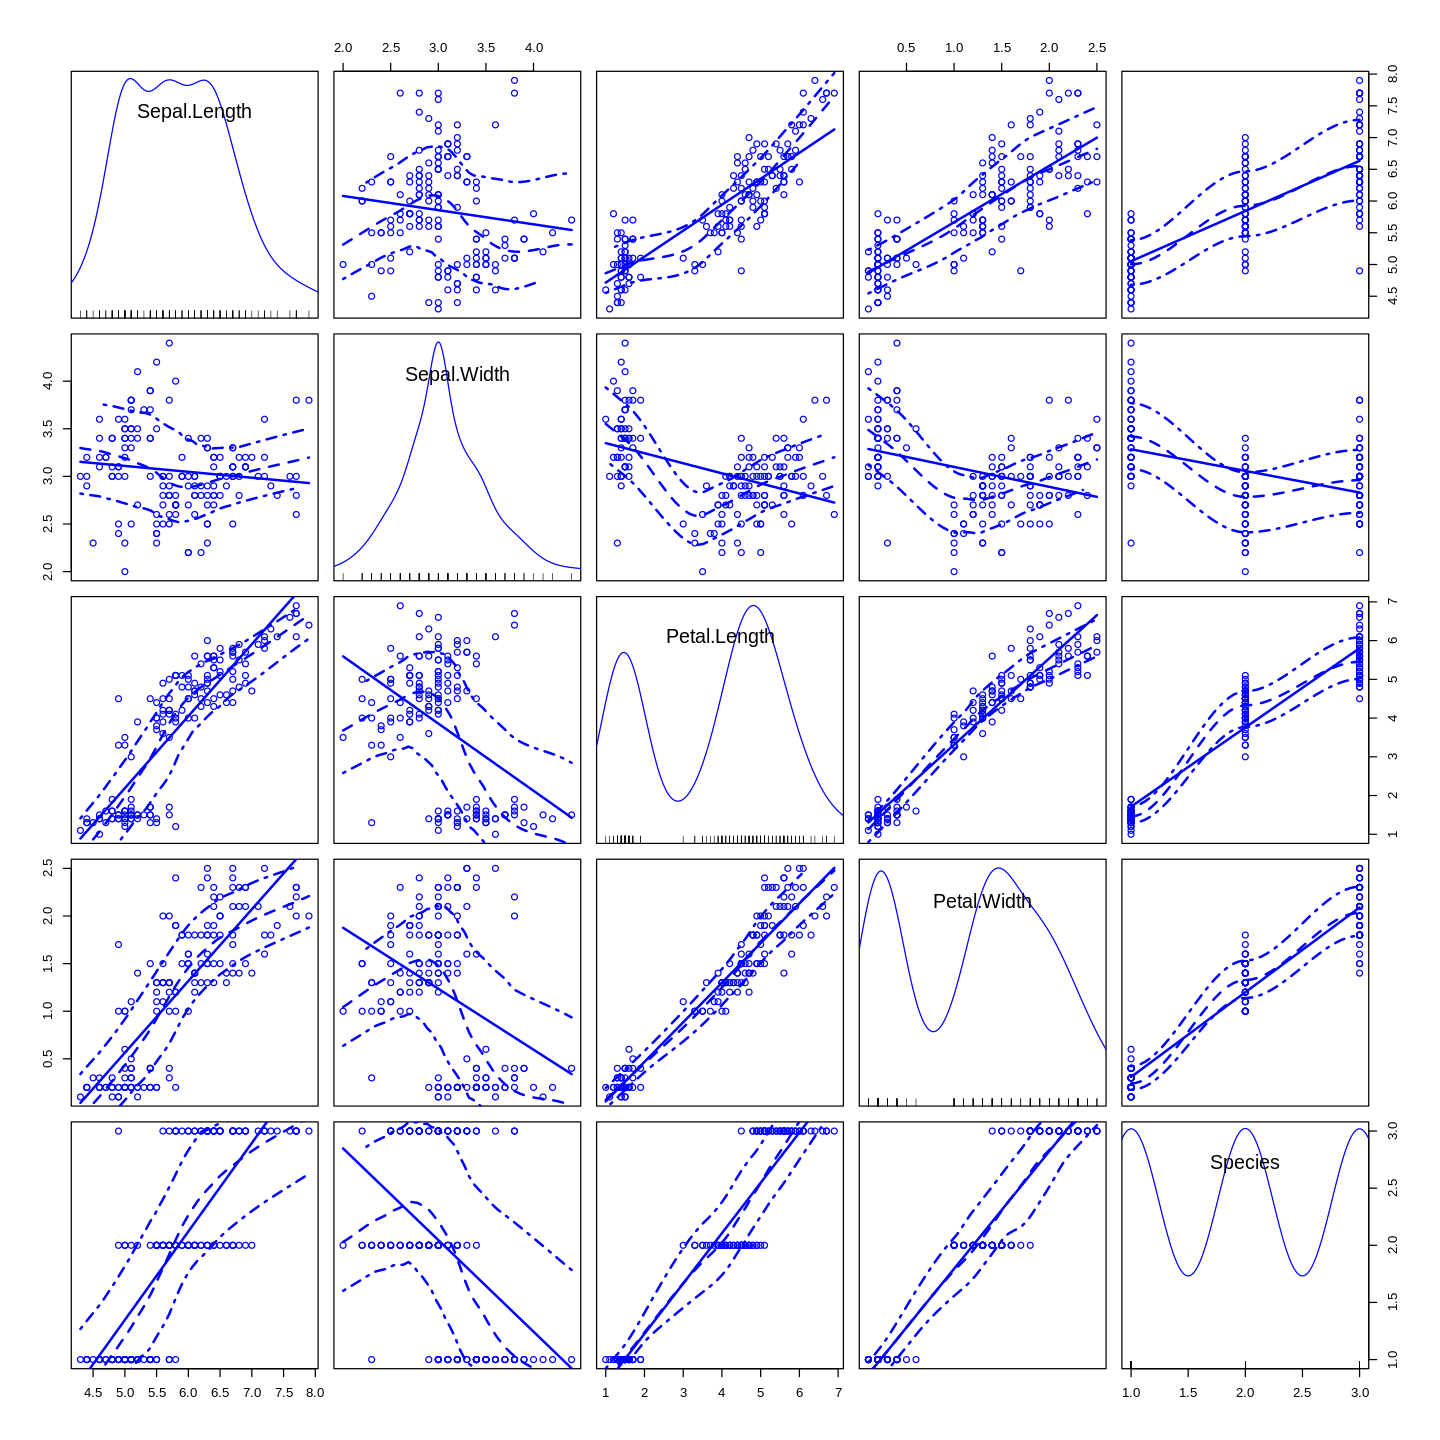

In [17]:
options(repr.plot.width=12, repr.plot.height=12)


scatterplotMatrix(iris)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



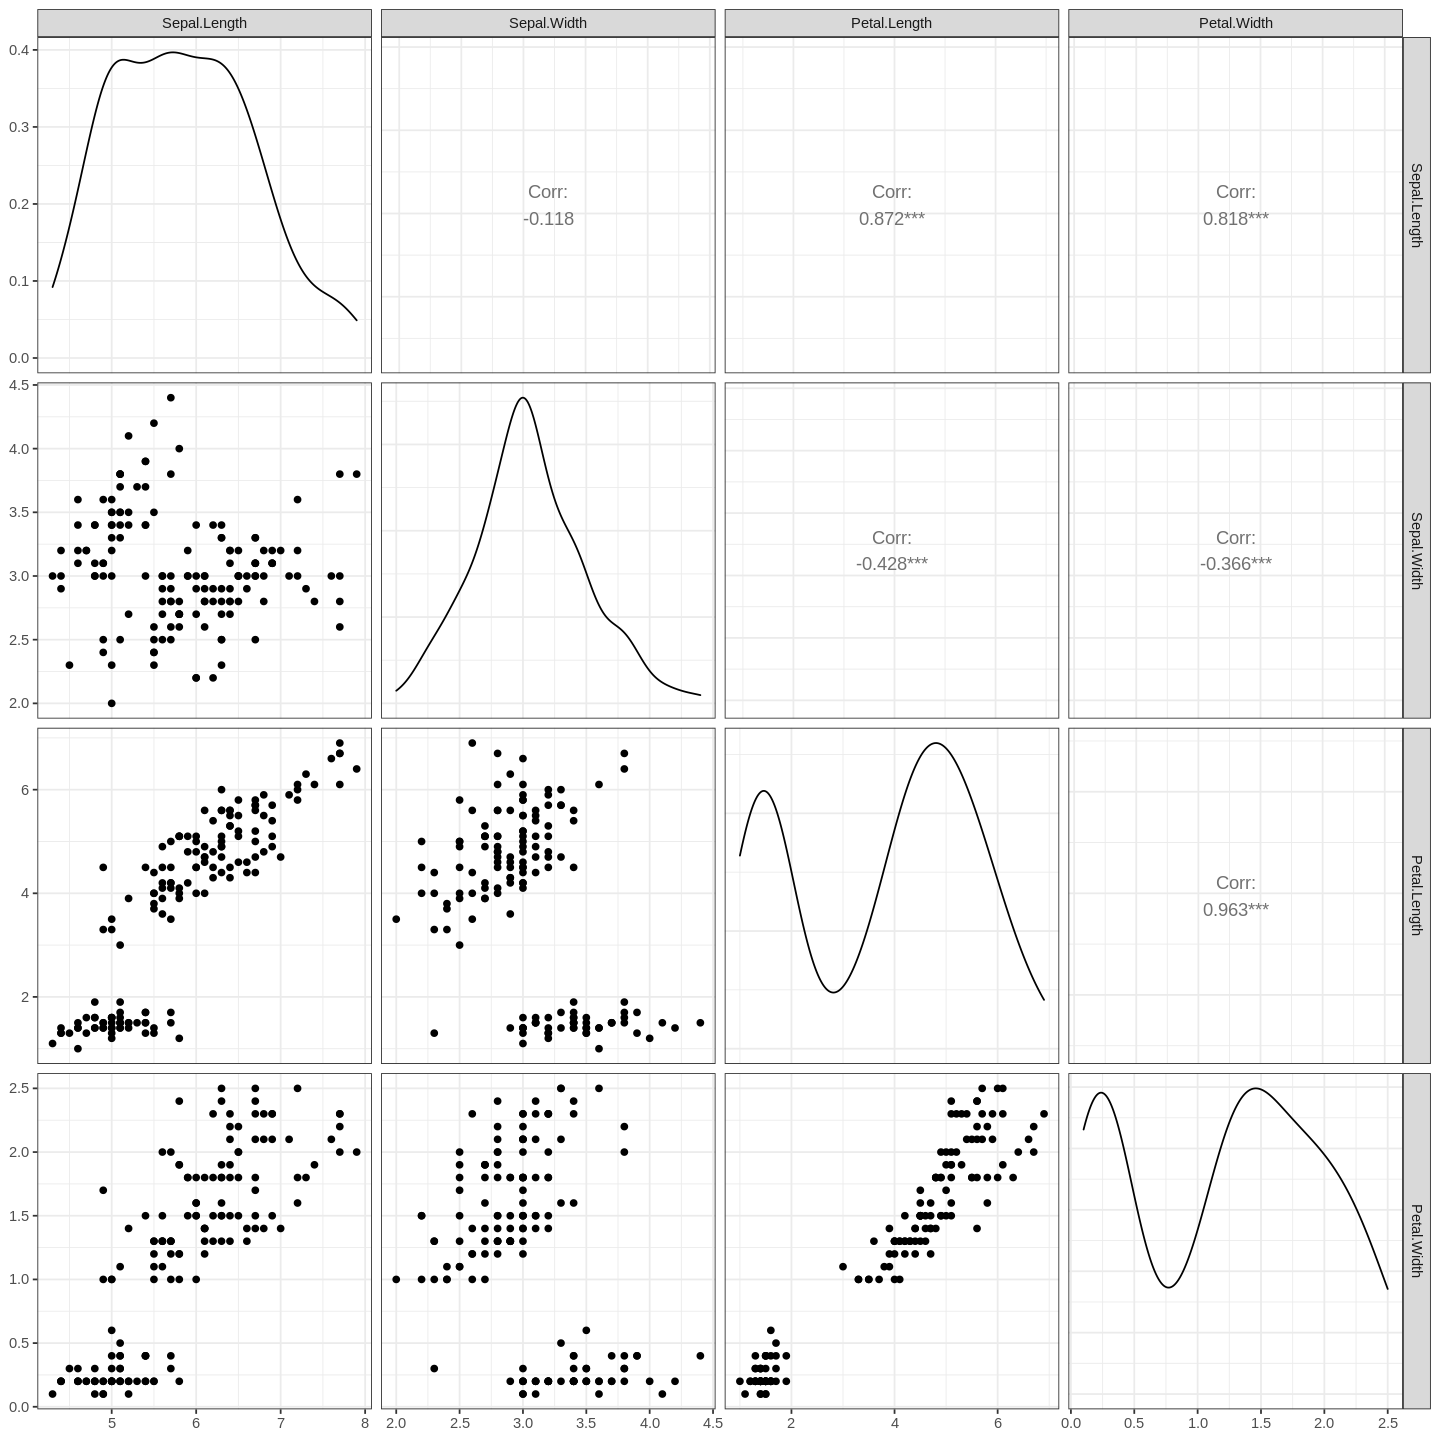

In [18]:
library(GGally)
ggpairs(iris[,-5])+ theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



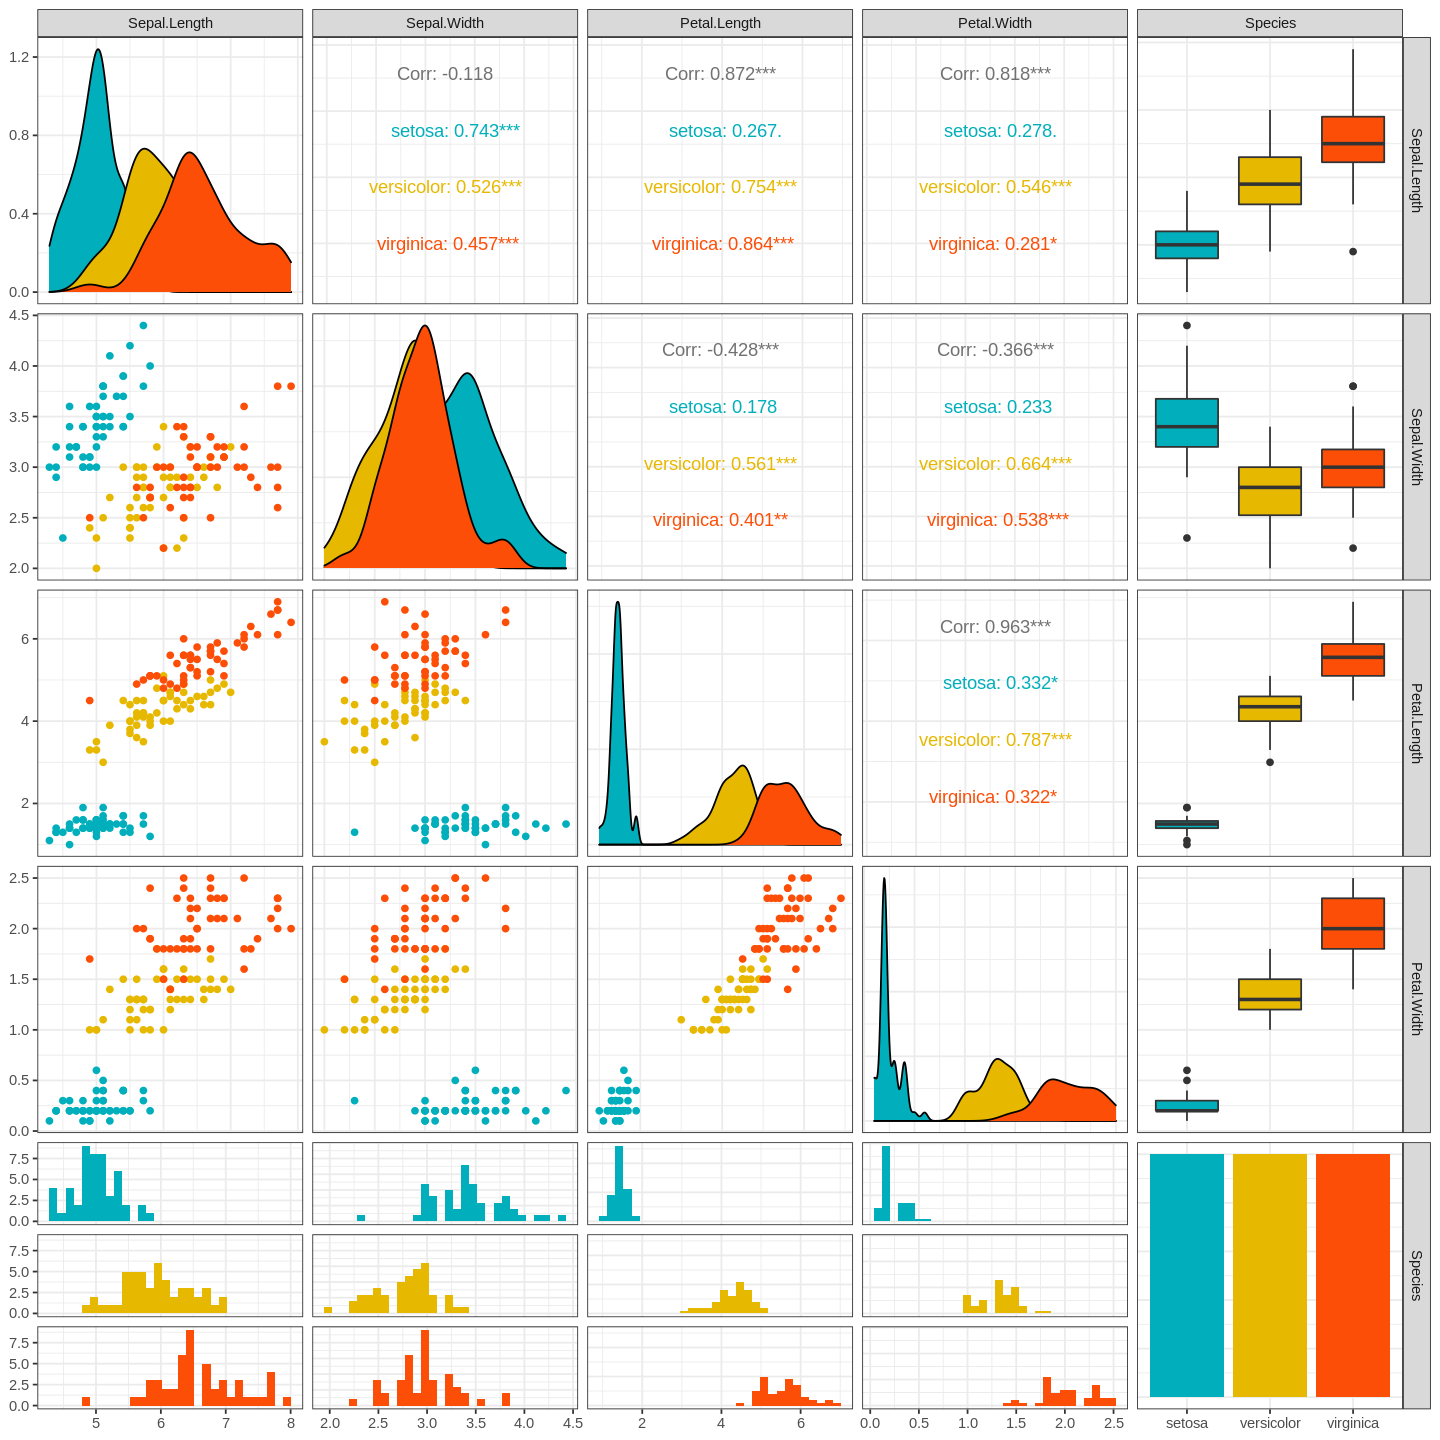

In [19]:
p <- ggpairs(iris, aes(color = Species))+ theme_bw()
# Change color manually.
# Loop through each plot changing relevant scales
for(i in 1:p$nrow) {
  for(j in 1:p$ncol){
    p[i,j] <- p[i,j] + 
        scale_fill_manual(values=c("#00AFBB", "#E7B800", "#FC4E07")) +
        scale_color_manual(values=c("#00AFBB", "#E7B800", "#FC4E07"))  
  }
}
p


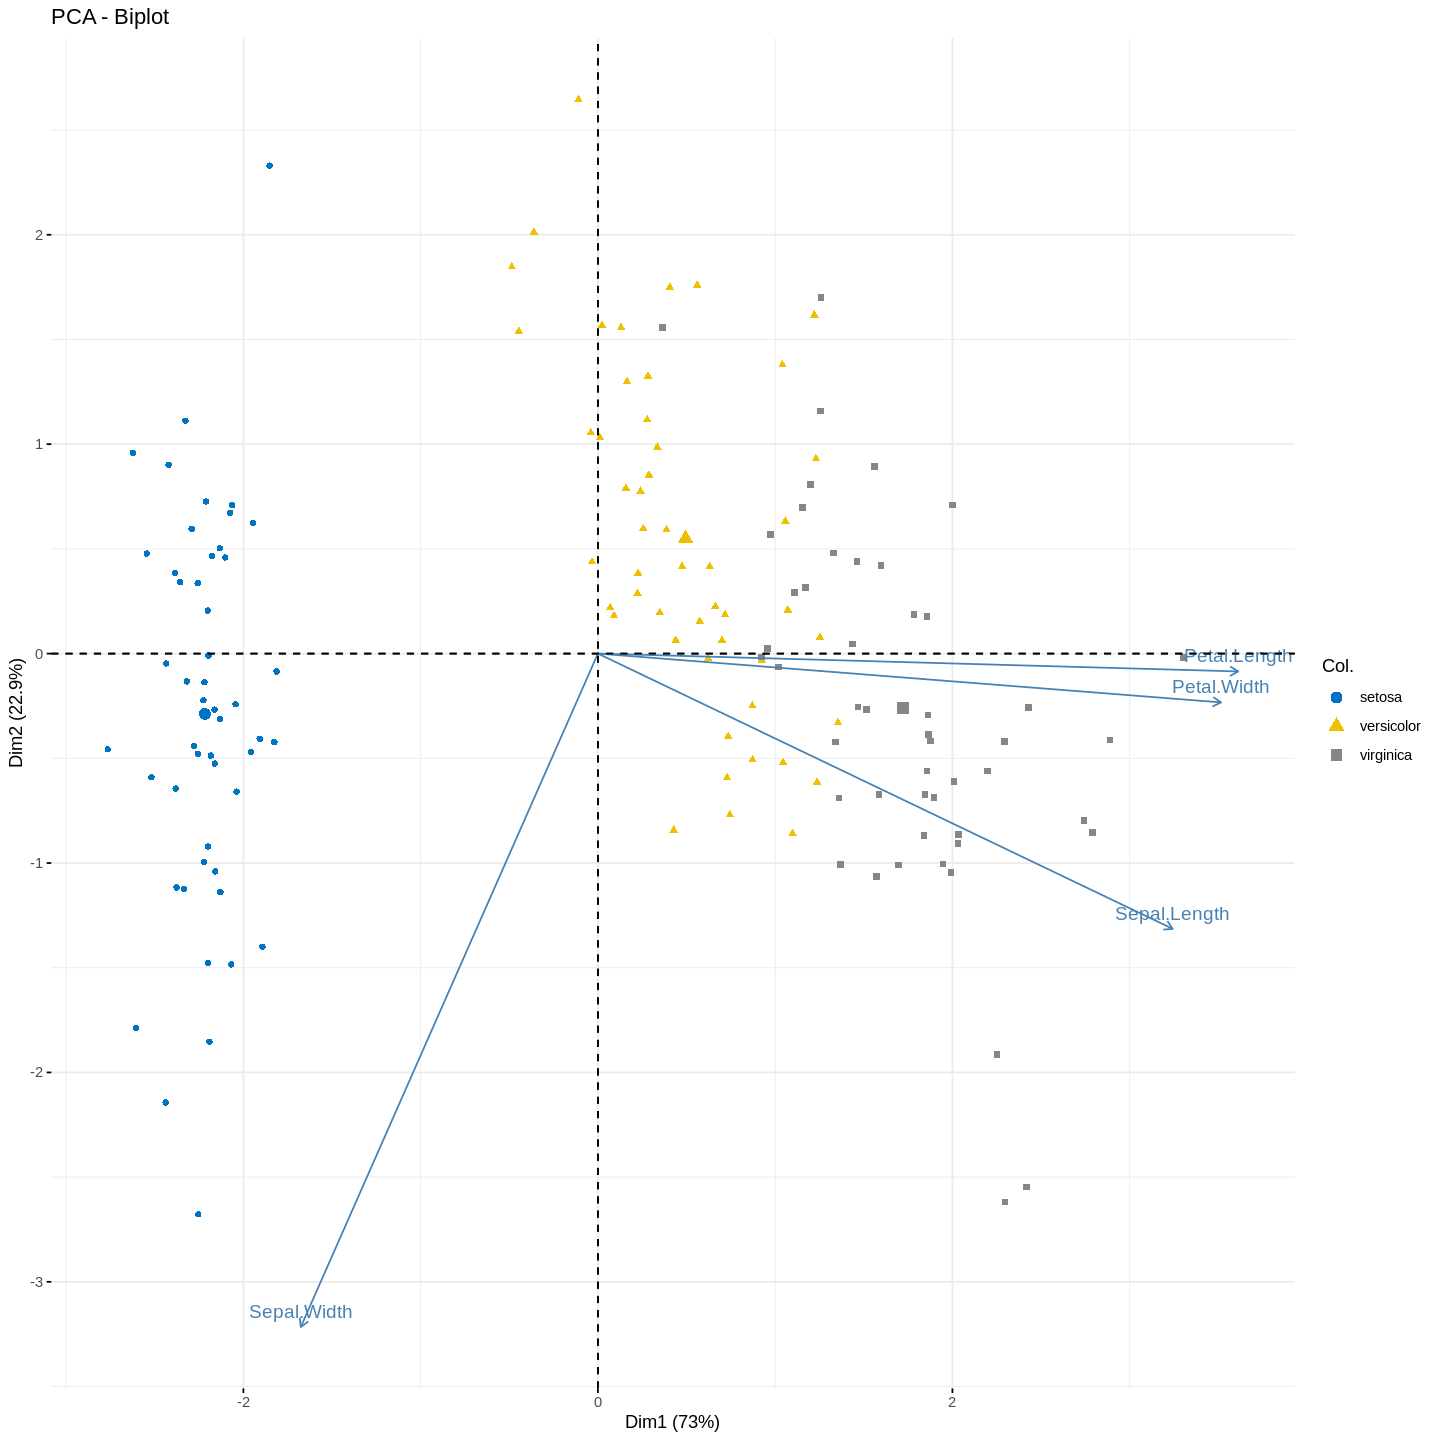

In [20]:
#This is an example of how to visualize and summarize the results of a PCA analysis 

my_data <- iris[, -5] # Remove the grouping variable
res.pca <- prcomp(my_data, scale = TRUE)
fviz_pca_biplot(res.pca, col.ind = iris$Species,
                palette = "jco", geom = "point")

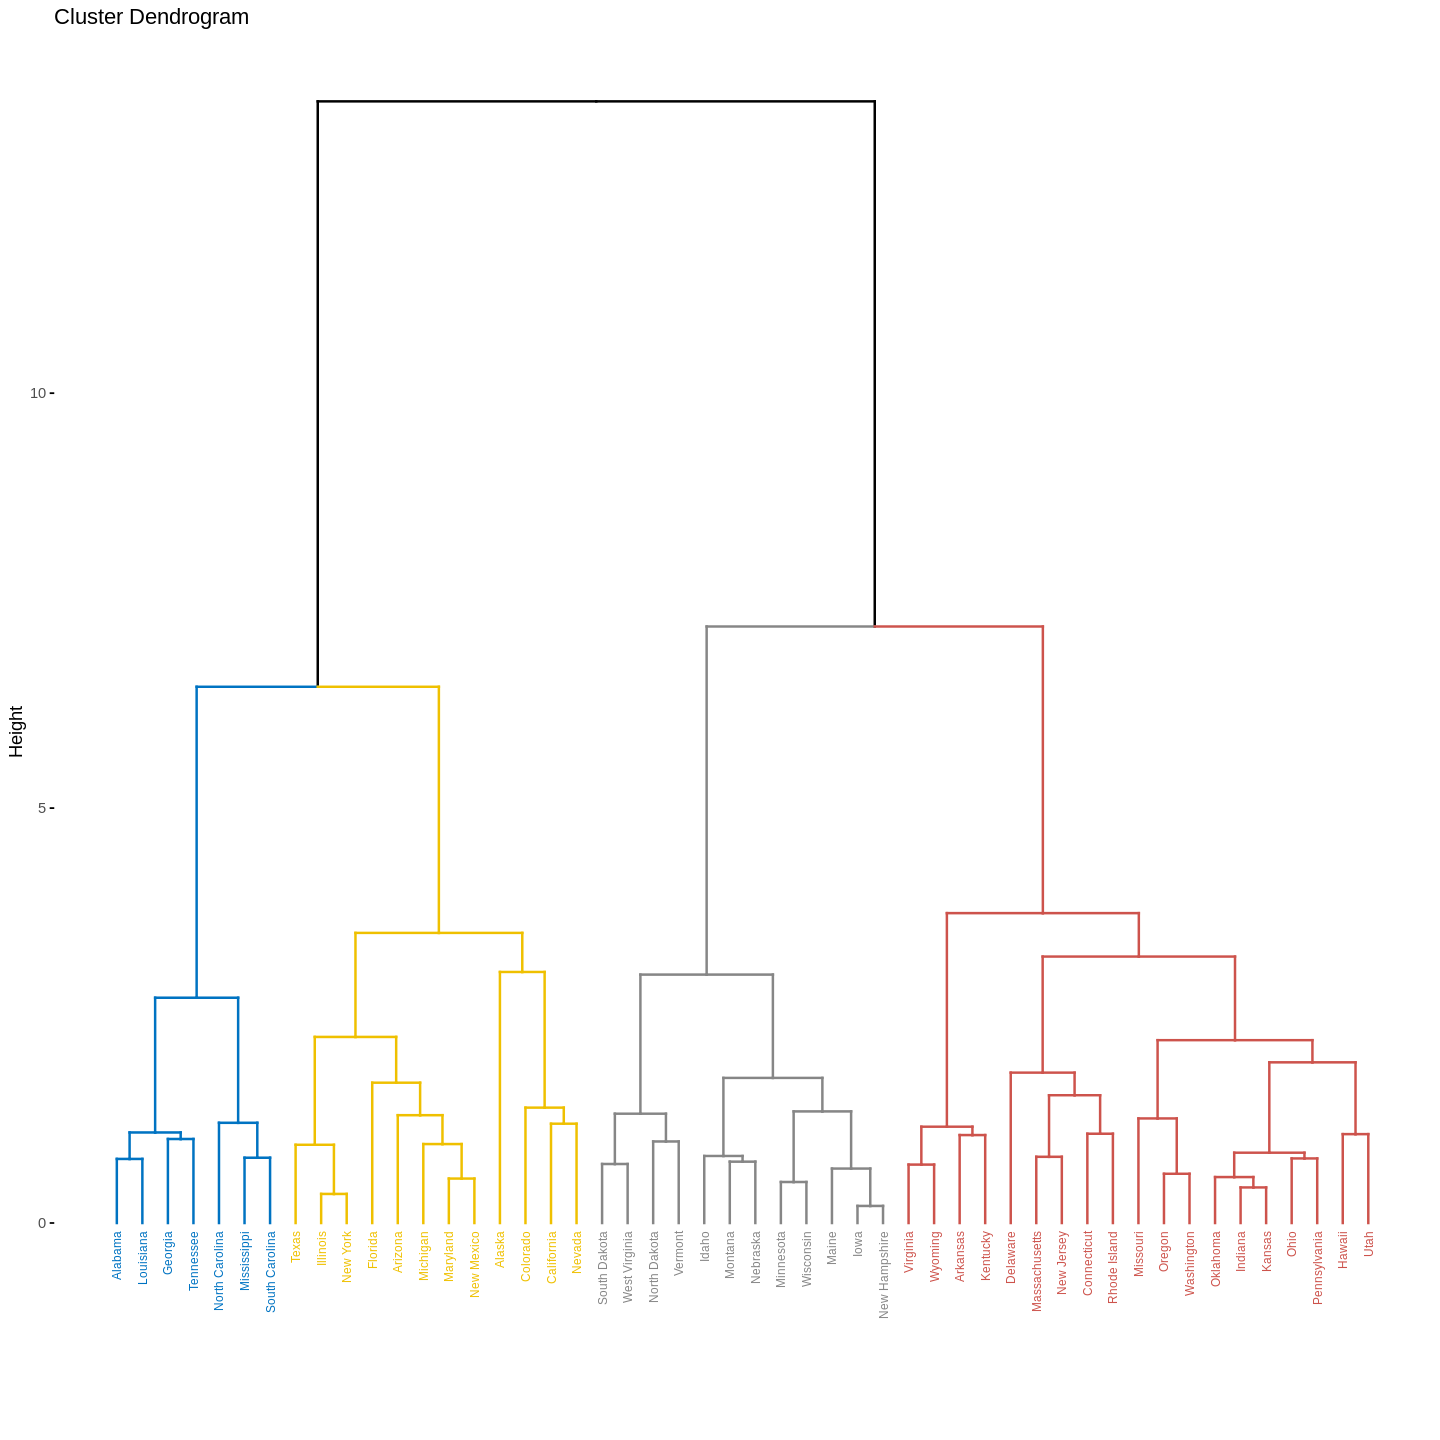

In [21]:
# This visualizes the clusters in the data 
USArrests %>%
  scale() %>%                           # Scale the data
  dist() %>%                            # Compute distance matrix
  hclust(method = "ward.D2") %>%        # Hierarchical clustering
  fviz_dend(cex = 0.5, k = 4, palette = "jco") # Visualize and cut 
                                              # into 4 groups

In [22]:
data("housetasks")

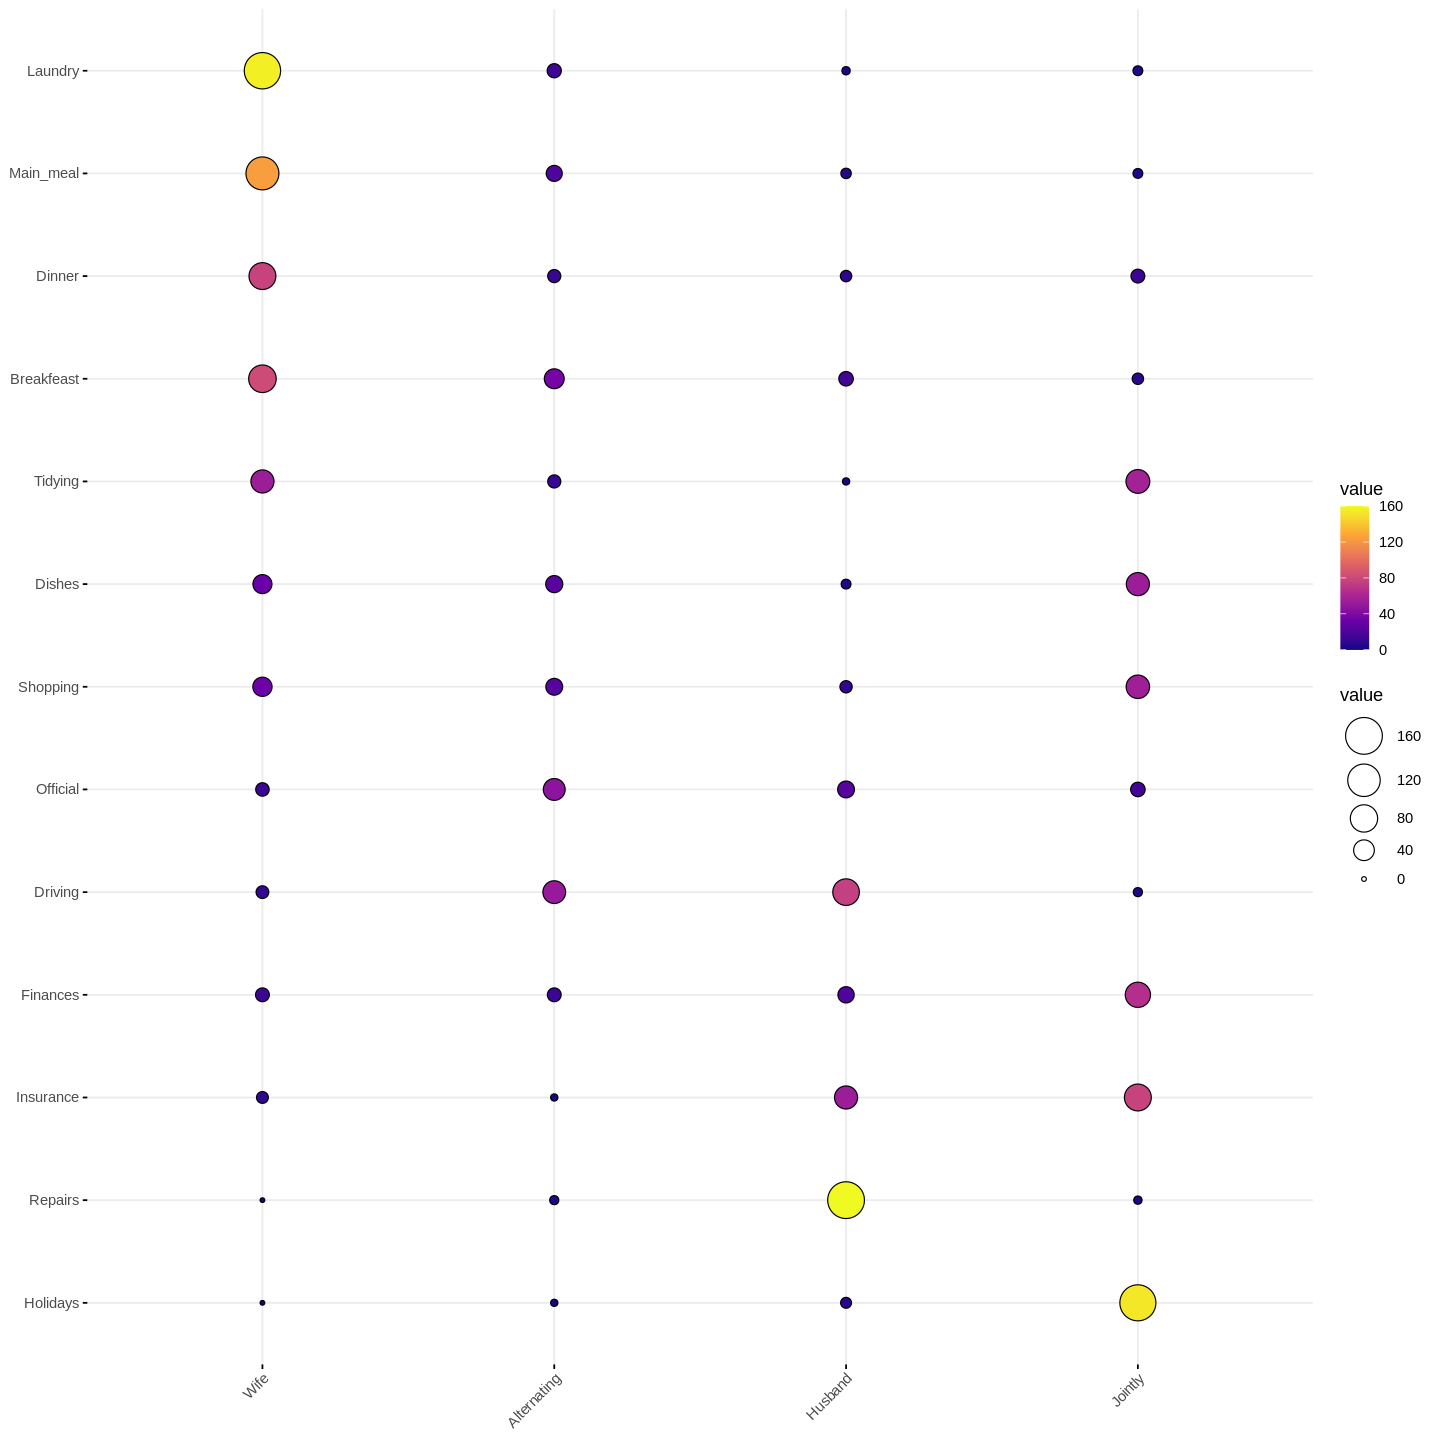

In [23]:
library(ggpubr)
theme_set(theme_pubr())

ggballoonplot(housetasks, fill = "value")+
  scale_fill_viridis_c(option = "C")